### Importação dos dados



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [25]:
faturamento_lojas = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    faturamento_lojas[nome] = df["Preço"].sum()

faturamento = pd.DataFrame(faturamento_lojas, index=['Faturamento']).T
print(faturamento)

       Faturamento
loja    1534509.12
loja2   1488459.06
loja3   1464025.03
loja4   1384497.58


# 2. Vendas por Categoria

In [29]:
vendas_por_categoria = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    vendas_por_categoria[nome] = df["Categoria do Produto"].value_counts()

# Cria DataFrame comparativo
tabela_comparativa = pd.DataFrame(vendas_por_categoria)
print(tabela_comparativa)

                       loja  loja2  loja3  loja4
Categoria do Produto                            
brinquedos              324    313    315    338
eletrodomesticos        312    305    278    254
eletronicos             448    422    451    451
esporte e lazer         284    275    277    277
instrumentos musicais   182    224    177    170
livros                  173    197    185    187
moveis                  465    442    499    480
utilidades domesticas   171    181    177    201


# 3. Média de Avaliação das Lojas


In [31]:
avaliacoes_lojas = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    avaliacoes_lojas[nome] = df["Avaliação da compra"].mean()

avaliacoes = pd.DataFrame(avaliacoes_lojas, index=['Média Avaliação']).T
print(avaliacoes)

       Média Avaliação
loja          3.976685
loja2         4.037304
loja3         4.048326
loja4         3.995759


# 4. Produtos Mais e Menos Vendidos

In [38]:
# Mais vendidos
mais_vendidos = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    mais_vendidos[nome] = df["Produto"].value_counts().head(5)

tabela_mais_vendidos = pd.DataFrame(mais_vendidos)
tabela_mais_vendidos = tabela_mais_vendidos.fillna(0).astype(int)
print(tabela_mais_vendidos)

                          loja  loja2  loja3  loja4
Produto                                            
Bateria                      0     61      0      0
Cama box                     0      0      0     62
Cama king                    0      0     56     56
Carrinho controle remoto     0      0      0     55
Cômoda                      56      0     55      0
Dashboards com Power BI      0      0      0     56
Faqueiro                     0      0      0     59
Guarda roupas               60      0      0      0
Iniciando em programação     0     65      0      0
Jogo de panelas              0      0     55      0
Kit banquetas                0      0     57      0
Mesa de jantar               0      0     56      0
Micro-ondas                 60     62      0      0
Pandeiro                     0     58      0      0
Secadora de roupas          58      0      0      0
TV Led UHD 4K               60      0      0      0
Violão                       0     58      0      0


In [39]:
# Menos vendidos
menos_vendidos = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    menos_vendidos[nome] = df["Produto"].value_counts().tail(5)

tabela_menos_vendidos = pd.DataFrame(menos_vendidos)
tabela_menos_vendidos = tabela_menos_vendidos.fillna(0).astype(int)
print(tabela_menos_vendidos)

                             loja  loja2  loja3  loja4
Produto                                               
Blocos de montar                0      0     35      0
Celular ABXY                   33      0      0      0
Ciência de dados com python    39      0      0     38
Fone de ouvido                  0     37      0      0
Geladeira                       0      0      0     38
Guarda roupas                   0      0      0     34
Guitarra                        0      0     38     33
Headset                        33      0      0      0
Impressora                      0     34      0      0
Jogo de copos                   0      0     36      0
Jogo de tabuleiro               0     32      0      0
Mesa de jantar                  0     34      0      0
Micro-ondas                     0      0     36      0
Mochila                         0      0     36      0
Pandeiro                       36      0      0      0
Panela de pressão              35      0      0      0
Poltrona  

# 5. Frete Médio por Loja

In [41]:
frete_medio_lojas = {}

for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    frete_medio_lojas[nome] = df["Frete"].mean()

frete_medio = pd.DataFrame(frete_medio_lojas, index=['Frete Médio']).T
print(frete_medio)

       Frete Médio
loja     34.691805
loja2    33.621941
loja3    33.074464
loja4    31.278997


## Gráficos

In [49]:
import matplotlib.pyplot as plt

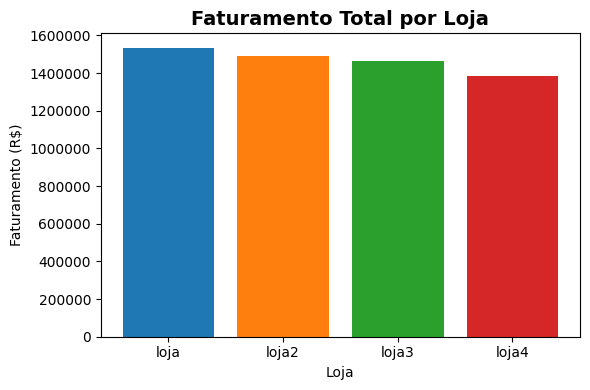

In [53]:
# GRÁFICO 1: Faturamento Total por Loja

faturamento_lojas = {}
for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    faturamento_lojas[nome] = df["Preço"].sum()

plt.figure(figsize=(6, 4))
plt.bar(faturamento_lojas.keys(), faturamento_lojas.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'])
plt.title('Faturamento Total por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Faturamento (R$)')
plt.xlabel('Loja')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

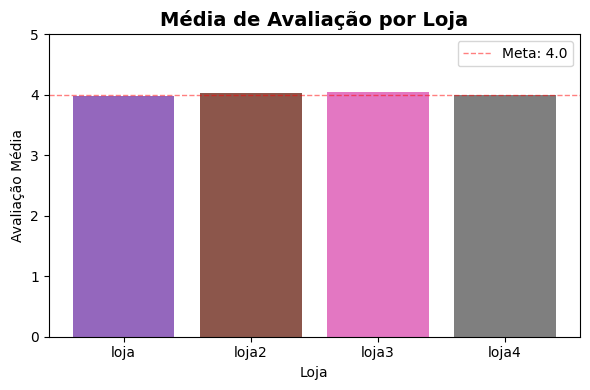

In [54]:
# GRÁFICO 2: Média de Avaliação por Loja

avaliacoes = {}
for nome, df in zip(['loja', 'loja2', 'loja3', 'loja4'], [loja, loja2, loja3, loja4]):
    avaliacoes[nome] = df["Avaliação da compra"].mean()

plt.figure(figsize=(6, 4))
plt.bar(avaliacoes.keys(), avaliacoes.values(), color=['#9467bd', '#8c564b', '#e377c2', '#7f7f7f'])
plt.title('Média de Avaliação por Loja', fontsize=14, fontweight='bold')
plt.ylabel('Avaliação Média')
plt.xlabel('Loja')
plt.ylim(0, 5)
plt.axhline(y=4, color='red', linestyle='--', linewidth=1, alpha=0.5, label='Meta: 4.0')
plt.legend()
plt.tight_layout()
plt.show()

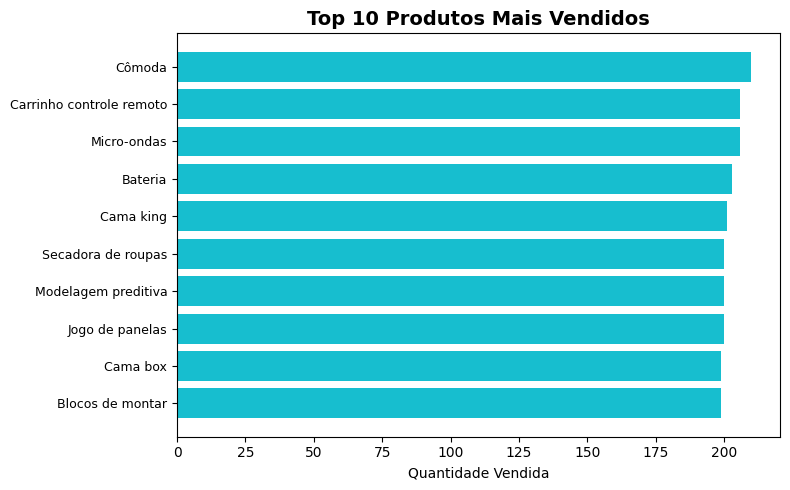

In [56]:
# GRÁFICO 3: Top 10 Produtos Mais Vendidos (todas lojas)

todos_produtos = pd.concat([loja, loja2, loja3, loja4])
top10_produtos = todos_produtos["Produto"].value_counts().head(10)

plt.figure(figsize=(8, 5))
plt.barh(range(len(top10_produtos)), top10_produtos.values, color='#17becf')
plt.yticks(range(len(top10_produtos)), top10_produtos.index, fontsize=9)
plt.title('Top 10 Produtos Mais Vendidos', fontsize=14, fontweight='bold')
plt.xlabel('Quantidade Vendida')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# RELATÓRIO FINAL

## RELATÓRIO - ANÁLISE DAS 4 LOJAS

## 1. OBJETIVO
Analisar o desempenho de 4 lojas para recomendar ao Sr. João qual loja ele deve vender,
considerando faturamento, satisfação do cliente, produtos vendidos e custos de frete.

---

## 2. RESUMO DOS DADOS ANALISADOS

### 2.1 Faturamento Total
- **loja**: 1.534.509,12 reais (MAIOR)
- **loja2**: 1.488.459,06 reais
- **loja3**: 1.464.025,03 reais
- **loja4**: 1.384.497,58 reais (MENOR)

**Análise:** A loja original tem o maior faturamento, com 150 mil reais a mais que a loja4.

---

### 2.2 Avaliação Média dos Clientes
- **loja3**: 4.05 (MELHOR)
- **loja2**: 4.04
- **loja4**: 4.00
- **loja**: 3.98 (PIOR)

**Análise:** A loja original tem a pior avaliação dos clientes. Isso pode indicar problemas
no atendimento, qualidade dos produtos ou experiência de compra.

---

### 2.3 Custo de Frete (pago pelo cliente)
- **loja4**: 31,28 reais (MAIS BARATO)
- **loja3**: 33,07 reais
- **loja2**: 33,62 reais
- **loja**: 34,69 reais (MAIS CARO)

**Análise:** A loja original cobra o frete mais caro, o que pode estar afastando clientes
e prejudicando a experiência de compra.

---

### 2.4 Categorias de Produtos
**Mais vendidas em todas as lojas:**
- Móveis (loja3 lidera com 499 vendas)
- Eletrônicos (loja3 e loja4 empatadas com 451)
- Brinquedos (loja4 lidera com 338)

**Observação:** Todas as lojas vendem categorias similares, sem grande diferença.

---

### 2.5 Produtos Mais e Menos Vendidos
Cada loja possui produtos exclusivos, tanto nos mais vendidos quanto nos menos vendidos.
Não há produtos compartilhados entre as lojas, o que indica que cada uma tem seu próprio
catálogo e público.

---

## 3. ANÁLISE COMPARATIVA

| Critério              | loja | loja2 | loja3 | loja4 |
|-----------------------|------|-------|-------|-------|
| Faturamento           | 1º   | 2º    | 3º    | 4º    |
| Avaliação Cliente     | 4º   | 2º    | 1º    | 3º    |
| Frete (cliente paga)  | 4º   | 3º    | 2º    | 1º    |

---

## 4. RECOMENDAÇÃO FINAL

### RECOMENDO VENDER A LOJA ORIGINAL (loja)

### JUSTIFICATIVA:

**Pontos Negativos da loja:**
1. **Pior avaliação dos clientes** (3.98) - indica insatisfação
2. **Frete mais caro** (34,69 reais) - afasta compradores
3. **Problemas de experiência** - combinação de avaliação baixa + frete alto

**Por que não vender as outras?**
- **loja2 e loja3**: Têm boas avaliações, frete competitivo e faturamento sólido.
  São lojas saudáveis que geram lucro consistente.
- **loja4**: Apesar do menor faturamento, tem frete mais barato e melhor avaliação
  que a loja original. Pode crescer com melhorias.

**Vantagem de vender a loja:**
Mesmo tendo o maior faturamento, ela apresenta **sinais de deterioração**:
clientes insatisfeitos e custos altos de frete indicam que o negócio pode estar
perdendo competitividade. É melhor vender agora enquanto o faturamento ainda está alto
e atrativo para compradores.

---

## 5. CONCLUSÃO

O Sr. João deve **vender a loja original** e manter as outras três. A loja, apesar
do faturamento alto, apresenta problemas estruturais (avaliação baixa e frete caro)
que podem prejudicar o negócio no futuro. As outras lojas estão mais saudáveis e
têm melhor potencial de crescimento.

---

**Elaborado por:** Paulo Martin

**Curso:** Data Science Alura - Challenge